In [1]:
# from IPython.core.interactiveshell import InteractiveShell
from sympy.logic.boolalg import And
from numpy import pi
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import sympy as sp
import sympy.physics.mechanics as me

np.set_printoptions(precision=2, suppress=True)
%precision 2

# InteractiveShell.ast_node_interactivity = "all"

me.init_vprinting()

t = sp.symbols('theta') # radian

def Full345(h, beta):
    beta = beta * pi / 180
    return h * (10*(t/beta)**3 - 15*(t/beta)**4 + 6*(t/beta)**5)

def Full4567(h, beta):
    beta = beta * pi / 180
    return h * (35*(t/beta)**4 - 84*(t/beta)**5 + 70*(t/beta)**6 - 20*(t/beta)**7)

def Full8thOrder(h, beta):
    beta = beta * pi / 180
    return h * (6.09755*(t/beta)**3 - 20.78040*(t/beta)**5 + 26.73155*(t/beta)**6 -\
          13.60965*(t/beta)**7 + 2.56095*(t/beta)**8)

def FullCycloidal(h, beta):
    beta = beta * pi / 180
    return h * (t/beta - 1/2/pi*sp.sin(2*pi*t/beta))

def FullDoubleHarmonic(h, beta):
    beta = beta * pi / 180
    return h/2* ((1-sp.cos(pi*t/beta)) - (1-sp.cos(2*pi*t/beta))/4)

def FullModifiedTrapezoidal(h, beta):
    beta = beta * pi / 180
    return sp.Piecewise(
        (h * (.38898448*t/beta - .0309544*sp.sin(4*pi*t/beta)), 
         And(0<=t, t<beta/8)),
        (h * (2.44406184*(t/beta)**2 - .22203097*t/beta + .00723407), 
         And(beta/8<=t, t<3*beta/8)),
        (h * (1.6110154*t/beta - .0309544*sp.sin(4*pi*t/beta-pi) - .3055077),
         And(3*beta/8<=t, t<5*beta/8)), 
        (h * (-2.44406184*(t/beta)**2 + 4.6660917*t/beta - 1.2292648),
         And(5*beta/8<=t, t<7*beta/8)), 
        (h * (.6110154 + .38898448*t/beta + .0309544*sp.sin(4*pi*t/beta - 3*pi)),
         And(7*beta/8<=t, t<=beta))
    )
    
def FullSimpleHarmonic(h, beta):
    beta = beta * pi / 180
    return h/2 * (1 - sp.cos(pi*t/beta))

def FullModifiedSinusoidal(h, beta):
    beta = beta * pi / 180
    return sp.Piecewise(
        (h * (.43990085*t/beta - .0350062*sp.sin(4*pi*t/beta)), 
        And(0<=t, t<beta/8)),
        (h * (.28004957 + .43990085*t/beta - .31505577*sp.cos(4*pi/3*t/beta-pi/6)), 
        And(beta/8<=t, t<7*beta/8)),
        (h * (.56009915 + .43990085*t/beta - .0350062*sp.sin(4*pi*t/beta-2*pi)), 
        And(7*beta/8<=t, t<=beta))
    )

def FullSCCA(h, beta, a, b, c):
    if a+b+c!=1:
        if a == np.max([a,b,c]):
            a = 1-b-c
            print("sum is not equal to 1. Attempting to correct a = {0:f}".format(1-b-c))
        elif b == np.max([a,b,c]):
            b = 1-c-a
            print("sum is not equal to 1. Attempting to correct b = {0:f}".format(1-a-c))
        elif c == np.max([a,b,c]):
            c = 1-b-a
            print("sum is not equal to 1. Attempting to correct c = {0:f}".format(1-b-a))
    beta = beta * pi / 180
    x = t / beta
    Ca = 4*pi**2 / ((pi**2-8)*(a**2-c**2) - 2*pi*(pi-2)*a + pi**2)
    Cv = Ca * ((a+c)/pi + b/2)
    Cj = Ca * pi / a
    return h*sp.Piecewise(
        (Ca * (a/pi*x - (a/pi)**2*sp.sin(pi/a*x)),
         And(0<=x, x<=a/2, a!=0)),
        (Ca * (x**2/2 + a*(1/pi-1/2)*x + a**2*(1/8-1/pi**2)),
         And(a/2<=x, x<=(1-c)/2)),
        (Ca * ((a/pi+b/2)*x + (c/pi)**2 + a**2*(1/8-1/pi**2) - (1-c)**2/8 - (c/pi)**2*sp.cos(pi/c*(x-(1-c)/2))),
         And((1-c)/2<=x, x<=(1+c)/2, c!=0)),
        (Ca * (-x**2/2 + (a/pi+1-a/2)*x + (2*c**2-a**2)*(1/pi**2-1/8) - 1/4),
         And((1+c)/2<=x, x<=1-a/2)),
        (Ca * (a/pi*x + 2*(c**2-a**2)/pi**2 + ((1-a)**2-c**2)/4 - (a/pi)**2*sp.sin(pi/a*(x-1))),
         And(1-a/2<=x, x<=1, a!=0)),
        (1,
         And(x>1))
    )
    
def HalfSimpleHarmonic1(h, beta):
    beta = beta * pi / 180
    return h * (1 - sp.cos(pi*t/2/beta))
    
def HalfSimpleHarmonic2(h, beta):
    beta = beta * pi / 180
    return h * sp.sin(pi*t/2/beta)
    
def HalfCycloidal1(h, beta):
    beta = beta * pi / 180
    return h * (t/beta + 1/pi*sp.sin(pi*t/beta))
    
def HalfCycloidal2(h, beta):
    beta = beta * pi / 180
    return h * (t/beta - 1/pi*sp.sin(pi*t/beta))

Peak displacement: 1.989 (mm)
Peak velocity: 190.905 (mm/s)
Peak acceleration: 32.713 (m/s^2)
Peak jerk: 22423.046 (m/s^3)


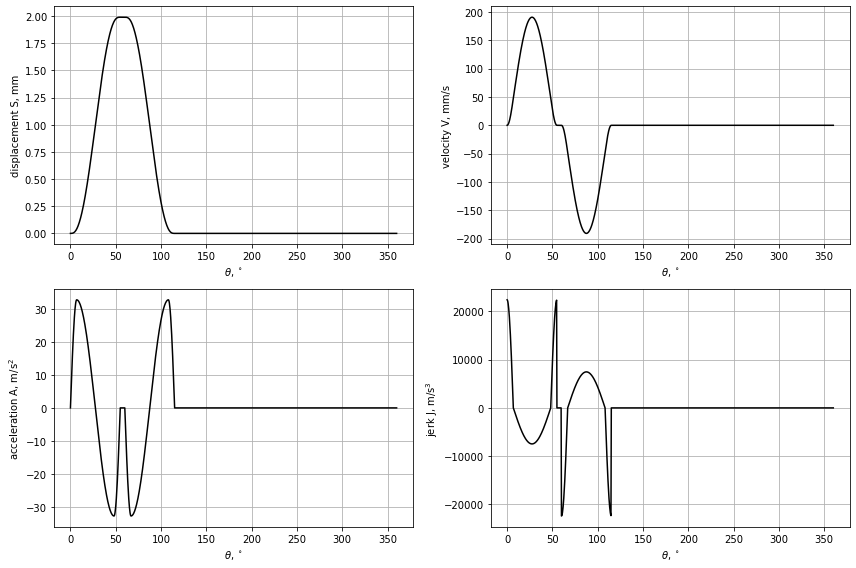

In [2]:
ang = 6
b1, b2, b3, b4 = 55, 5, 55, 245
num, n = 1000, 500
omg = n*np.pi/30
h = float(2*sp.cos(ang*sp.pi/180))
# b1, b2, b3, b4 = 90, 90, 90, 90
# num, n = 1000, 60
# omg = n*np.pi/30
# h = 25#float(2*sp.cos(ang*sp.pi/180))

s1 =  FullModifiedSinusoidal(h,b1)
s2 = s2n = np.ones(int(num*b2/360))*h
# s3 = h * (1 - t/b3r + 1/2/sp.pi*sp.sin(2*sp.pi*t/b3r))
s3 = -FullModifiedSinusoidal(h,b3) + h
s4 = s4n = np.zeros(int(num*b4/360))
s1n = sp.lambdify(t,s1)
s3n = sp.lambdify(t,s3)

t1 = np.linspace(0,b1,int(num*b1/360),endpoint=0)
t2 = np.linspace(0,b2,int(num*b2/360),endpoint=0)
t3 = np.linspace(0,b3,int(num*b3/360),endpoint=0)
t4 = np.linspace(0,b4,int(num*b4/360))
xs = np.hstack([t1,b1+t2,b1+b2+t3,b1+b2+b3+t4])
ys = np.hstack([s1n(t1*np.pi/180),s2n,s3n(t3*np.pi/180),s4n])

ds1 = s1.diff()
ds2 = ds2n = np.zeros(int(num*b2/360))
ds3 = s3.diff()
ds1n = sp.lambdify(t, ds1)
ds3n = sp.lambdify(t, ds3)
dys = np.hstack([ds1n(t1*np.pi/180),ds2n,ds3n(t3*np.pi/180),s4n])

dds1 = ds1.diff()
dds3 = ds3.diff()
dds1n = sp.lambdify(t, dds1)
dds3n = sp.lambdify(t, dds3)
ddys = np.hstack([dds1n(t1*np.pi/180),ds2n,dds3n(t3*np.pi/180),s4n])

ddds1 = dds1.diff()
ddds3 = dds3.diff()
ddds1n = sp.lambdify(t, ddds1)
ddds3n = sp.lambdify(t, ddds3)
dddys = np.hstack([ddds1n(t1*np.pi/180),ds2n,ddds3n(t3*np.pi/180),s4n])

fig, ax = plt.subplots(2,2,figsize=(12,8))
ax[0][0].plot(xs,ys,label='S',c='k')
ax[0][0].set_xlabel(r'$\theta$, $^\circ$')
ax[0][0].set_ylabel(r'displacement S, mm')
ax[0][0].grid()

ax[0][1].plot(xs,dys*omg,label='V',c='k')
ax[0][1].set_xlabel(r'$\theta$, $^\circ$')
ax[0][1].set_ylabel(r'velocity V, mm/s')
ax[0][1].grid()

ax[1][0].plot(xs,ddys*omg**2/1e3,label='A',c='k')
ax[1][0].set_xlabel(r'$\theta$, $^\circ$')
ax[1][0].set_ylabel(r'acceleration A, m/s$^2$')
ax[1][0].grid()

ax[1][1].plot(xs,dddys*omg**3/1e3,label='J',c='k')
ax[1][1].set_xlabel(r'$\theta$, $^\circ$')
ax[1][1].set_ylabel(r'jerk J, m/s$^3$')
ax[1][1].grid()

plt.tight_layout()
print(r'Peak displacement: {0:.3f} (mm)'.format(np.max(abs(ys))))
print(r'Peak velocity: {0:.3f} (mm/s)'.format(np.max(abs(dys*omg))))
print(r'Peak acceleration: {0:.3f} (m/s^2)'.format(np.max(abs(ddys*omg**2)/1e3)))
print(r'Peak jerk: {0:.3f} (m/s^3)'.format(np.max(abs(dddys*omg**3/1e3))))

# plt.savefig('SVAJ2.png',dpi=600)

In [3]:
rho_min = 1.5
Rb = rho_min - min(ys + ddys)
# plt.plot(-ys-ddys)
# print(np.where(-ys-ddys==min(-ys-ddys)))
# 260/1000*360
print(Rb)
Rb = 12
print(max(dys)-min(dys))
# pn = sp.lambdify(t,p)
# plt.plot(np.linspace(0,100), pn(np.linspace(0,100)))

11.484593628513698
7.292040450552966


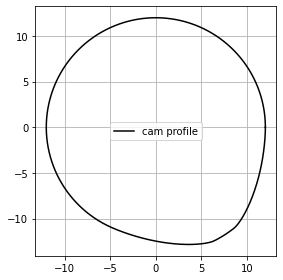

In [4]:
s, x, theta = ys, dys, xs*np.pi/180
RA = np.sqrt((Rb+s)**2 + x**2)
sigA = theta + np.arctan(x/(Rb + s))

xn = RA * np.cos(sigA)
yn = -np.sign(omg) * RA * np.sin(sigA)

fig, ax = plt.subplots()
ax.plot(xn,yn,'k',label='cam profile')
ax.grid()
ax.set_aspect('equal')
ax.legend()

# fig, ax = plt.subplots(2,1, figsize=(8,11))
# ax[0].plot(xn,yn,'k',label='cam profile')
# ax[0].grid()
# ax[0].set_aspect('equal')
# ax[0].legend()
# ax[1].plot(xs,-ys-ddys,'k')
# ax[1].grid()
# ax[1].set_xlabel
plt.tight_layout()
np.savetxt('cam_profile.txt',np.array([xn,yn,np.zeros(len(xn))]).T,delimiter='\t')